In [1]:
import pandas as pd
customer_master = pd.read_csv('../../data/chap_1/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [12]:
item_master = pd.read_csv('../../data/chap_1/item_master.csv')
transaction_1 = pd.read_csv('../../data/chap_1/transaction_1.csv')
transaction_2 = pd.read_csv('../../data/chap_1/transaction_2.csv')
transaction_detail_1 = pd.read_csv('../../data/chap_1/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('../../data/chap_1/transaction_detail_2.csv')

In [4]:
print(item_master.shape)
item_master.head()

(5, 3)


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
print(transaction_1.shape)
transaction_1.head()

(5000, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
print(transaction_2.shape)
transaction_2.head()

(1786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [11]:
print(transaction_detail_1.shape)
transaction_detail_1.head()

(5000, 4)


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [13]:
print(transaction_detail_2.shape)
transaction_detail_2.head()

(2144, 4)


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [19]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [20]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


In [23]:
# merge 
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [25]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')

In [26]:
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,宍戸 明,2019-01-04 13:24:40,ししど あきら,shishido_akira@example.com,M,64,1955/1/13,福井県,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,相原 みき,2019-02-11 19:34:02,あいはら みき,aihara_miki@example.com,F,74,1945/2/3,北海道,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,松田 早紀,2019-04-17 09:23:50,まつだ さき,matsuda_saki@example.com,F,40,1979/5/25,福島県,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,進藤 正敏,2019-02-20 18:15:56,しんどう まさとし,shinndou_masatoshi@example.com,M,56,1963/2/21,東京都,PC-B,85000


In [27]:
# price列を作成
join_data['price'] = join_data['item_price'] * join_data['quantity']
join_data[['quantity', 'item_price', 'price']]

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000
...,...,...,...
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000


In [29]:
# 検算
join_data['price'].sum() == transaction['price'].sum()

True

In [32]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [39]:
join_data.describe(include='all')

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
count,7144.000000,7144,7144,7144.000000,7144,7144,7144,7144,7144,7144,7144,7144.000000,7144,7144,7144,7144.000000,7144.000000
unique,NaN,6786,5,NaN,6785,3018,2998,3018,2988,3018,2,NaN,2809,47,5,NaN,NaN
top,NaN,T0000000790,S001,NaN,2019-02-18 15:11:38,AS237205,角田 美月,2019-01-19 15:53:42,かどた みづき,kadota_miduki@example.com,M,NaN,1947/6/17,東京都,PC-A,NaN,NaN
freq,NaN,4,2143,NaN,4,13,13,13,13,13,3596,NaN,13,727,2143,NaN,NaN
mean,3571.500000,NaN,NaN,1.199888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.265677,NaN,NaN,NaN,121698.628219,135937.150056
std,2062.439494,NaN,NaN,0.513647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.190314,NaN,NaN,NaN,64571.311830,68511.453297
min,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,50000.000000,50000.000000
25%,1785.750000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,50000.000000,85000.000000
50%,3571.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,102500.000000,120000.000000
75%,5357.250000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,187500.000000,210000.000000


In [40]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [41]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [42]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [50]:
join_data.groupby('payment_month').sum()['price']

payment_month
201902    137615.979381
201903    135791.701948
201904    135565.878378
201905    132837.606838
201906    136464.226290
201907    137264.682220
Name: price, dtype: float64

Text(0.5, 0, 'year month')

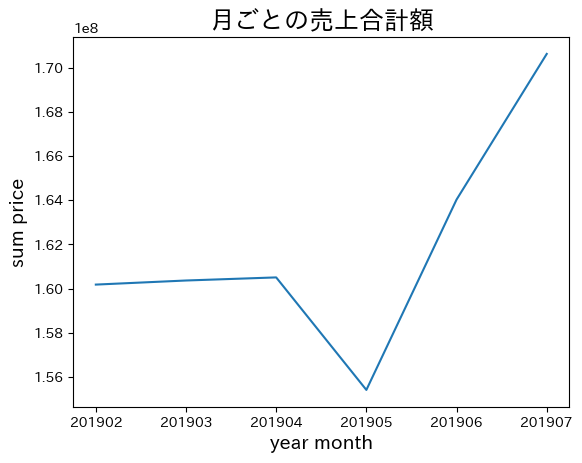

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
plt.plot(join_data.groupby('payment_month').sum()['price'])
plt.title('月ごとの売上合計額', fontsize=18)
plt.ylabel('sum price', fontsize=14)
plt.xlabel('year month', fontsize=14)

In [78]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [79]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [92]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


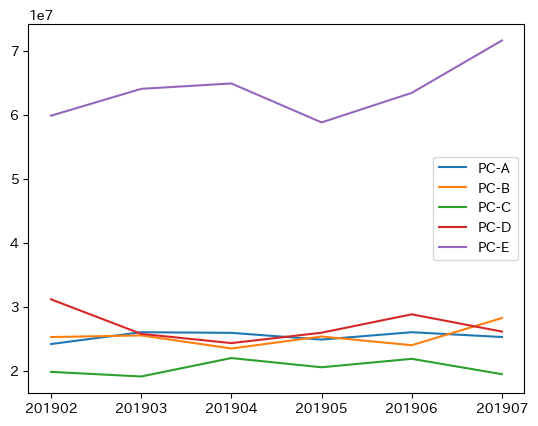

In [95]:
plt.plot(graph_data)
plt.legend(list(graph_data.columns))

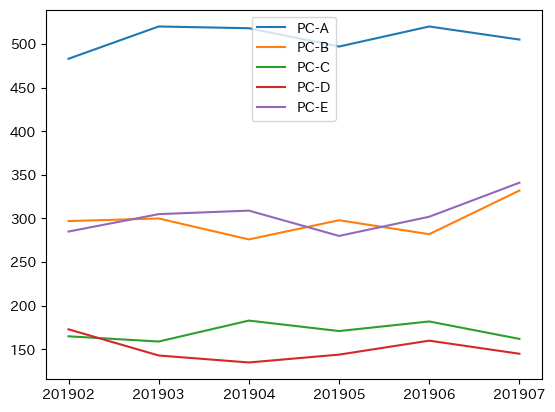

In [76]:
plt.plot(pd.pivot_table(join_data, index='payment_month', columns='item_name', values=['quantity'], aggfunc='sum'))
plt.legend(['PC-A', 'PC-B', 'PC-C', 'PC-D', 'PC-E'])